In [1]:
# ✅ Upload your student_performance.csv file
from google.colab import files
uploaded = files.upload()

import pandas as pd

df_student = pd.read_csv('student_performance.csv')
print(df_student.shape)
df_student.head()


Saving student_performance.csv to student_performance.csv
(2, 33)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,teacher,teacher,...,4,3,4,1,1,3,4,15,14,15
1,MS,M,17,R,LE3,T,3,2,health,services,...,5,4,2,2,3,5,10,14,15,15


In [2]:
# ✅ 1) Check for missing values
print(df_student.isnull().sum())

# ✅ 2) If your CSV has no missing data, you’re good!
# For safety: fill missing numeric with mean, categorical with mode
num_cols = df_student.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df_student.select_dtypes(include=['object']).columns

df_student[num_cols] = df_student[num_cols].fillna(df_student[num_cols].mean())
df_student[cat_cols] = df_student[cat_cols].fillna(df_student[cat_cols].mode().iloc[0])

print(df_student.isnull().sum())


school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health     

In [3]:
# ✅ One-hot encode all categorical features
df_student_encoded = pd.get_dummies(df_student, drop_first=True)

print("Encoded shape:", df_student_encoded.shape)
df_student_encoded.head()


Encoded shape: (2, 31)


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,Mjob_teacher,Fjob_teacher,reason_home,guardian_mother,schoolsup_yes,famsup_yes,paid_yes,activities_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,True,True,False,True,True,False,False,True,False,False
1,17,3,2,1,3,1,5,4,2,2,...,False,False,True,False,False,True,True,False,True,True


In [4]:
# ✅ Predict final grade (G3)
X = df_student_encoded.drop('G3', axis=1)
y = df_student_encoded['G3']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (1, 30)
Test shape: (1, 30)


In [5]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

print("Intercept:", lr.intercept_)
print("Number of coefficients:", len(lr.coef_))


Intercept: 15.0
Number of coefficients: 30


In [6]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")


MSE: 0.00
RMSE: 0.00
R2 Score: nan


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


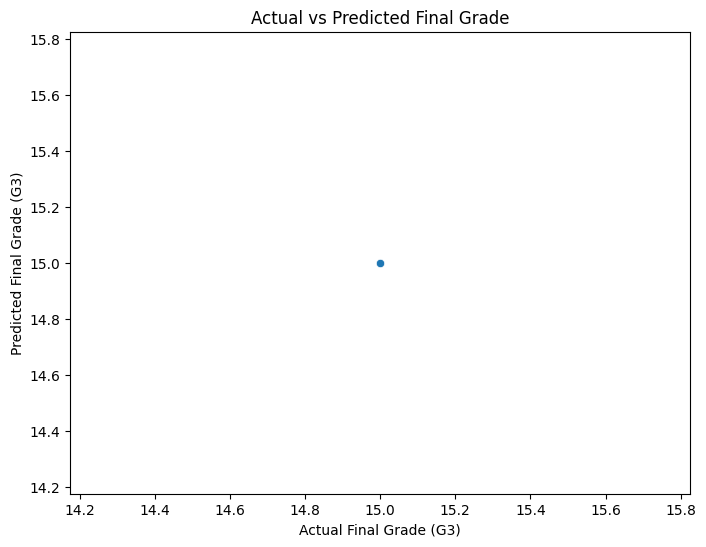

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Final Grade (G3)")
plt.ylabel("Predicted Final Grade (G3)")
plt.title("Actual vs Predicted Final Grade")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # y=x
plt.show()


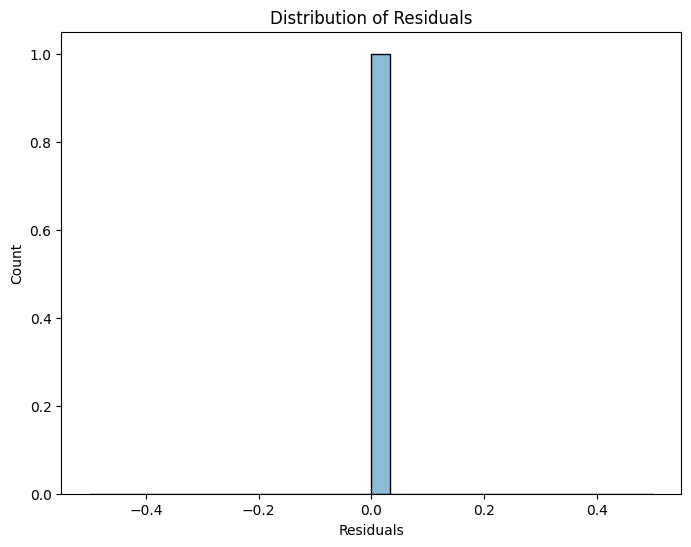

In [8]:
residuals = y_test - y_pred

plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True, bins=30)
plt.xlabel("Residuals")
plt.title("Distribution of Residuals")
plt.show()
